In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import variance
import tensorflow as tf
from tensorflow import keras

#url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
#zip_path = keras.utils.get_file(origin=url, fname="jena_climate_2009_2016.csv.zip")
#zip_file = ZipFile(zip_path)
#zip_file.extractall()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jena-climate/jena_climate_2009_2016.csv


In [2]:
df = pd.read_csv(path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


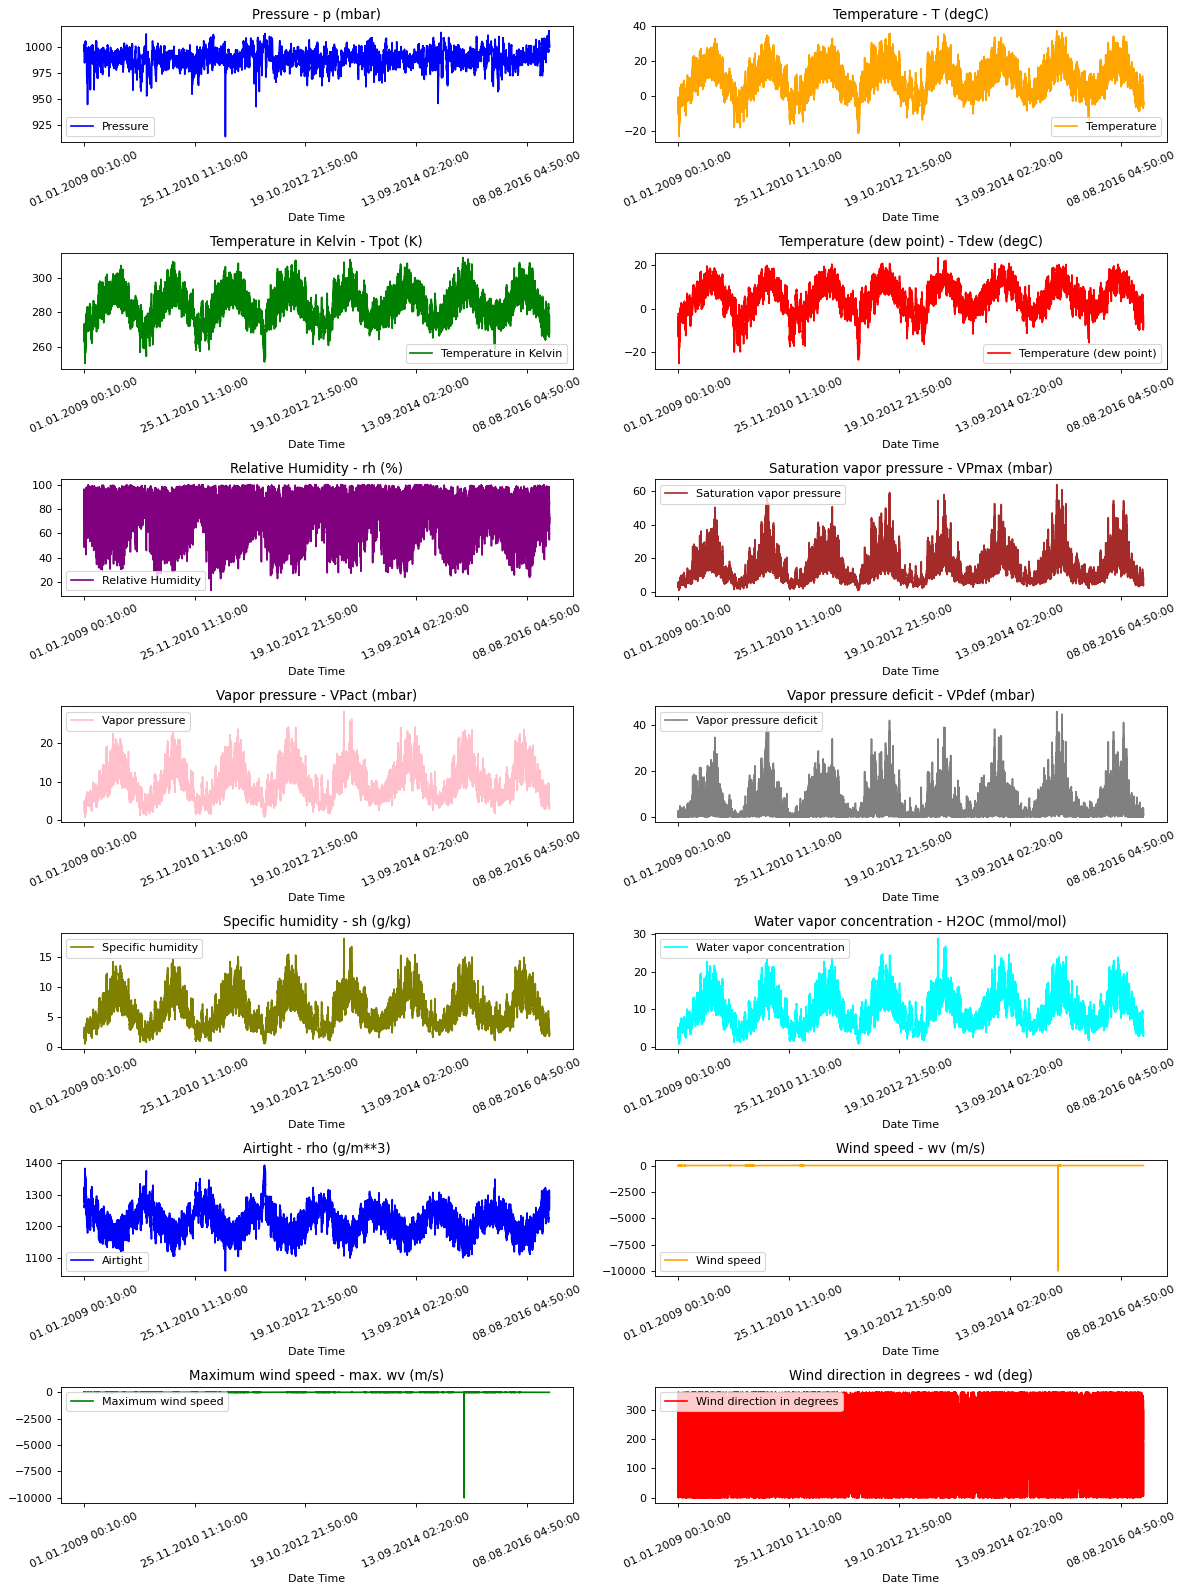

In [3]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

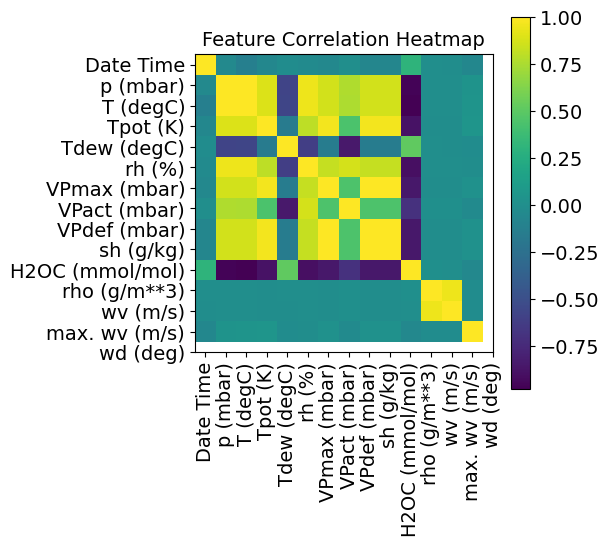

In [4]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [5]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))

#Observation is recorded every 10 mins, that means 6 times per hour
step = 6

# tracking data from past 720 timestamps
past = 720
# predicting data after 720 timestamps
future = 72
learning_rate = 0.01
batch_size = 13140
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


def test(data, train_split):
    data_mean = data[train_split+1:].mean(axis=0)
    data_std = data[train_split+1:].std(axis=0)
    return (data - data_mean) / data_std

In [6]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

test_data = test(features.values, train_split)
features = normalize(features.values, train_split)

features = pd.DataFrame(features)
test_data = pd.DataFrame(test_data)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [7]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [8]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [9]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

x_test = test_data.iloc[:][[i for i in range(7)]].values
y_test = test_data.iloc[:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (13140, 120, 7)
Target shape: (13140, 1)


In [10]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1280      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [11]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.1954
Epoch 1: val_loss improved from inf to 1.70366, saving model to model_checkpoint.h5
23/23 [==============================] - 53s 2s/step - loss: 2.1954 - val_loss: 1.7037
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.4328
Epoch 2: val_loss improved from 1.70366 to 1.15399, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 1.4328 - val_loss: 1.1540
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.9700
Epoch 3: val_loss improved from 1.15399 to 0.84812, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.9700 - val_loss: 0.8481
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.7223
Epoch 4: val_loss improved from 0.84812 to 0.65212, saving model to model_checkpoint.h5
23/23 [==============================] - 51s 2s/step - loss: 0.7223 - val_loss: 0.6521
Epoc

In [12]:
test_loss=model.evaluate(dataset_test)
print(test_loss)

32/32 [==============================] - 37s 1s/step - loss: 0.6033
0.6032946109771729


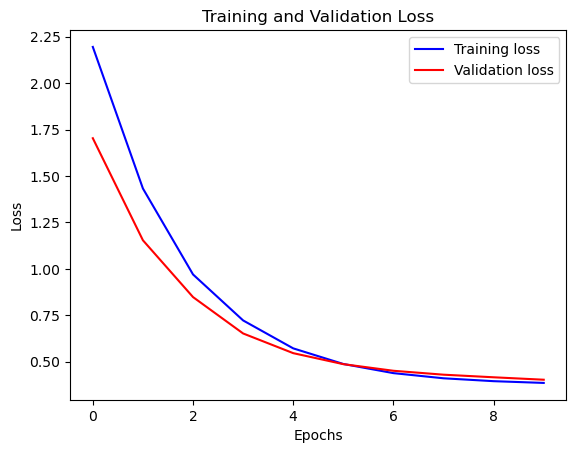

In [13]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

411/411 [==============================] - 4s 9ms/step


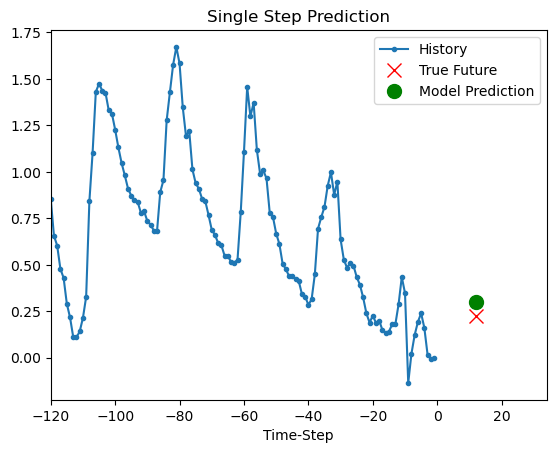

411/411 [==============================] - 4s 9ms/step


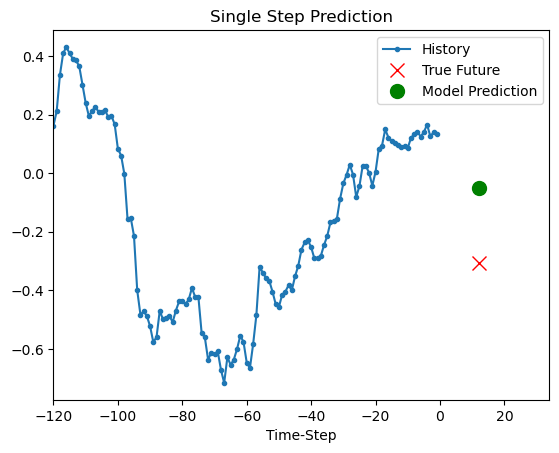

411/411 [==============================] - 4s 9ms/step


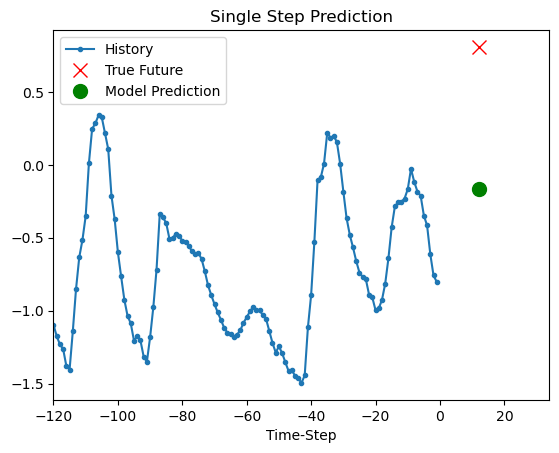

411/411 [==============================] - 4s 9ms/step


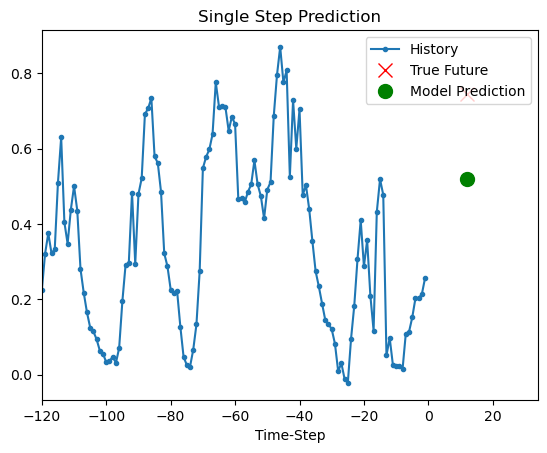

411/411 [==============================] - 3s 8ms/step


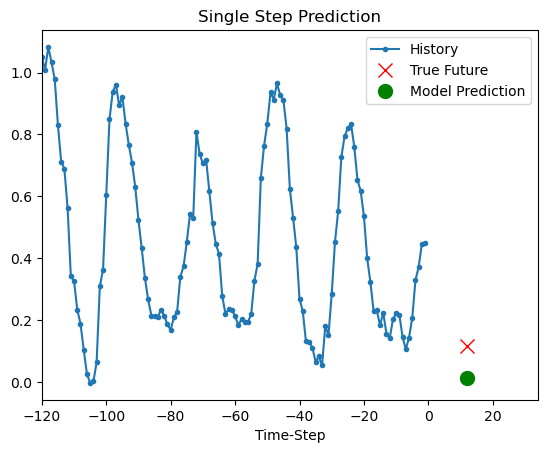

In [14]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [15]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [16]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.0927
Epoch 1: val_loss improved from inf to 1.62290, saving model to model_checkpoint.h5
23/23 [==============================] - 43s 2s/step - loss: 2.0927 - val_loss: 1.6229
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.3428
Epoch 2: val_loss improved from 1.62290 to 1.06188, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 1.3428 - val_loss: 1.0619
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.8784
Epoch 3: val_loss improved from 1.06188 to 0.70939, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.8784 - val_loss: 0.7094
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.6398
Epoch 4: val_loss improved from 0.70939 to 0.57249, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.6398 - val_loss: 0.5725
Epoc

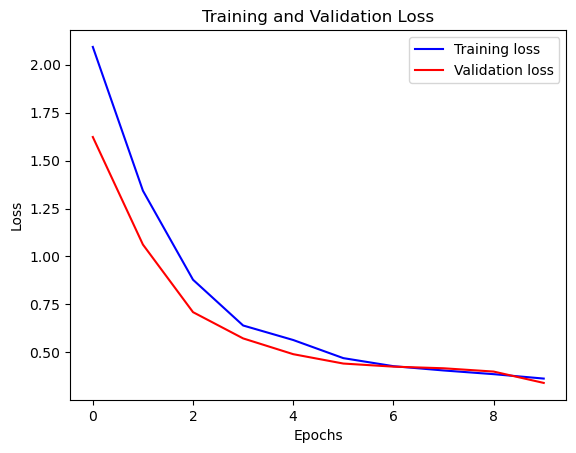

In [17]:
visualize_loss(history, "Training and Validation Loss")

In [18]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [19]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.4040
Epoch 1: val_loss improved from inf to 1.93978, saving model to model_checkpoint.h5
23/23 [==============================] - 43s 2s/step - loss: 2.4040 - val_loss: 1.9398
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.5796
Epoch 2: val_loss improved from 1.93978 to 1.24965, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 1.5796 - val_loss: 1.2496
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 1.0299
Epoch 3: val_loss improved from 1.24965 to 0.81545, saving model to model_checkpoint.h5
23/23 [==============================] - 52s 2s/step - loss: 1.0299 - val_loss: 0.8155
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.7149
Epoch 4: val_loss improved from 0.81545 to 0.58575, saving model to model_checkpoint.h5
23/23 [==============================] - 51s 2s/step - loss: 0.7149 - val_loss: 0.5857
Epoc

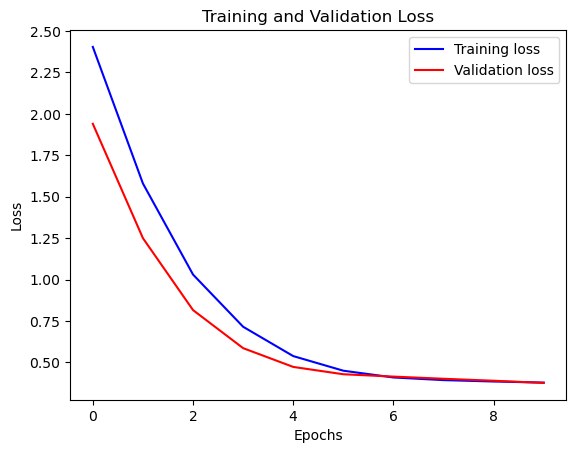

In [20]:
visualize_loss(history, "Training and Validation Loss")

In [21]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [22]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.2543
Epoch 1: val_loss improved from inf to 1.77615, saving model to model_checkpoint.h5
23/23 [==============================] - 52s 2s/step - loss: 2.2543 - val_loss: 1.7762
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.4805
Epoch 2: val_loss improved from 1.77615 to 1.14816, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 1.4805 - val_loss: 1.1482
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.9623
Epoch 3: val_loss improved from 1.14816 to 0.80883, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.9623 - val_loss: 0.8088
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.7104
Epoch 4: val_loss improved from 0.80883 to 0.62668, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.7104 - val_loss: 0.6267
Epoc

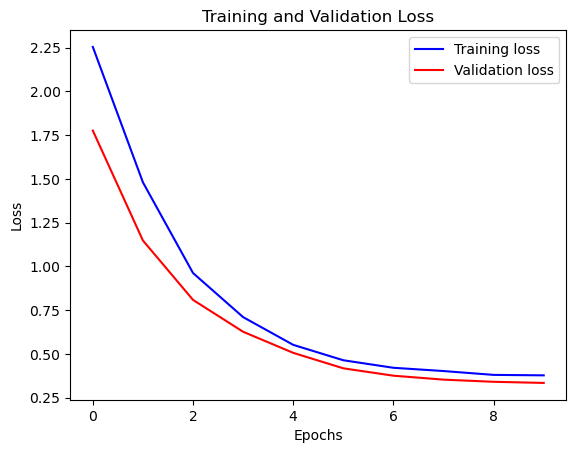

In [23]:
visualize_loss(history, "Training and Validation Loss")

In [24]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [25]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.9240
Epoch 1: val_loss improved from inf to 0.70356, saving model to model_checkpoint.h5
23/23 [==============================] - 52s 2s/step - loss: 0.9240 - val_loss: 0.7036
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.6246
Epoch 2: val_loss improved from 0.70356 to 0.56362, saving model to model_checkpoint.h5
23/23 [==============================] - 51s 2s/step - loss: 0.6246 - val_loss: 0.5636
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4755
Epoch 3: val_loss improved from 0.56362 to 0.41623, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.4755 - val_loss: 0.4162
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3747
Epoch 4: val_loss improved from 0.41623 to 0.33799, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.3747 - val_loss: 0.3380
Epoc

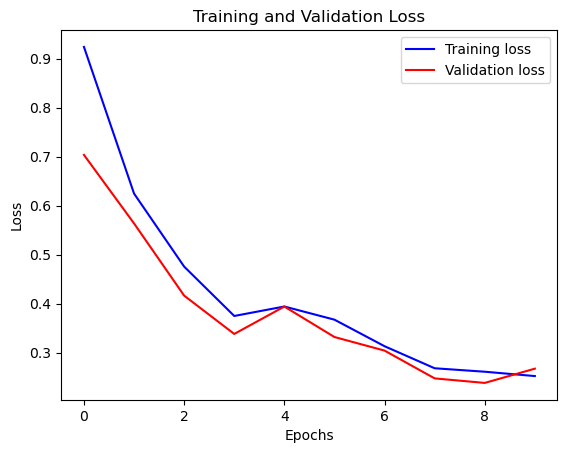

In [26]:
visualize_loss(history, "Training and Validation Loss")

In [27]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [28]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8552
Epoch 1: val_loss improved from inf to 0.63967, saving model to model_checkpoint.h5
23/23 [==============================] - 43s 2s/step - loss: 0.8552 - val_loss: 0.6397
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.5761
Epoch 2: val_loss improved from 0.63967 to 0.50095, saving model to model_checkpoint.h5
23/23 [==============================] - 51s 2s/step - loss: 0.5761 - val_loss: 0.5010
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4316
Epoch 3: val_loss improved from 0.50095 to 0.38685, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.4316 - val_loss: 0.3869
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3786
Epoch 4: val_loss improved from 0.38685 to 0.35088, saving model to model_checkpoint.h5
23/23 [==============================] - 51s 2s/step - loss: 0.3786 - val_loss: 0.3509
Epoc

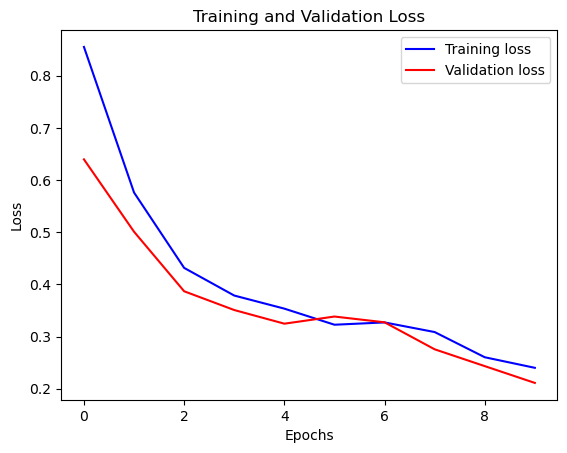

In [29]:
visualize_loss(history, "Training and Validation Loss")

In [30]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [31]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8192
Epoch 1: val_loss improved from inf to 0.65981, saving model to model_checkpoint.h5
23/23 [==============================] - 42s 2s/step - loss: 0.8192 - val_loss: 0.6598
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.5660
Epoch 2: val_loss improved from 0.65981 to 0.53224, saving model to model_checkpoint.h5
23/23 [==============================] - 40s 2s/step - loss: 0.5660 - val_loss: 0.5322
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4559
Epoch 3: val_loss improved from 0.53224 to 0.40409, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.4559 - val_loss: 0.4041
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3803
Epoch 4: val_loss improved from 0.40409 to 0.35144, saving model to model_checkpoint.h5
23/23 [==============================] - 50s 2s/step - loss: 0.3803 - val_loss: 0.3514
Epoc

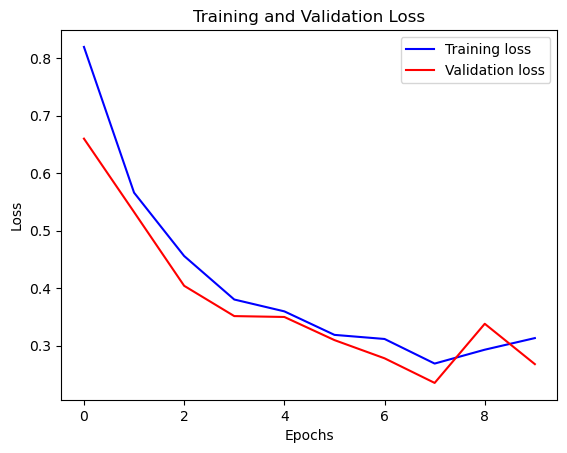

In [32]:
visualize_loss(history, "Training and Validation Loss")

In [33]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [34]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8578
Epoch 1: val_loss improved from inf to 0.64743, saving model to model_checkpoint.h5
23/23 [==============================] - 42s 2s/step - loss: 0.8578 - val_loss: 0.6474
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.5838
Epoch 2: val_loss improved from 0.64743 to 0.53812, saving model to model_checkpoint.h5
23/23 [==============================] - 42s 2s/step - loss: 0.5838 - val_loss: 0.5381
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4756
Epoch 3: val_loss improved from 0.53812 to 0.43408, saving model to model_checkpoint.h5
23/23 [==============================] - 41s 2s/step - loss: 0.4756 - val_loss: 0.4341
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4093
Epoch 4: val_loss improved from 0.43408 to 0.38571, saving model to model_checkpoint.h5
23/23 [==============================] - 51s 2s/step - loss: 0.4093 - val_loss: 0.3857
Epoc

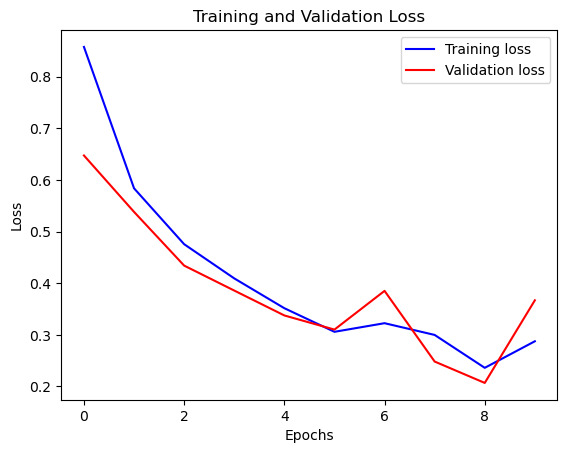

In [35]:
visualize_loss(history, "Training and Validation Loss")

In [36]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
model.summary()
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.2543
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 42s 2s/step - loss: 1.2543 - val_loss: 1.0055
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.8543
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.8543 - val_loss: 0.7457
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.6323
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 52s 2s/step - loss: 0.6323 - val_loss: 0.5645
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5021
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 51s 2s/step - loss: 0.5021 - val_loss: 0.4680
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.4272
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 4

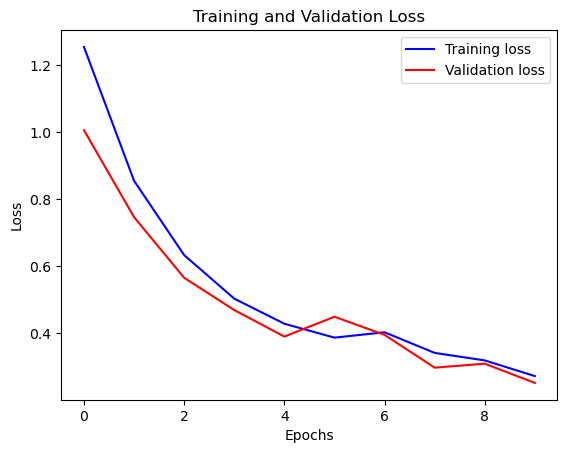

In [37]:
visualize_loss(history, "Training and Validation Loss")

In [38]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.1044
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 43s 2s/step - loss: 1.1044 - val_loss: 0.8706
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.7884
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.7884 - val_loss: 0.6595
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.5834
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.5834 - val_loss: 0.4955
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4645
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.4645 - val_loss: 0.4387
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.4109
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 5

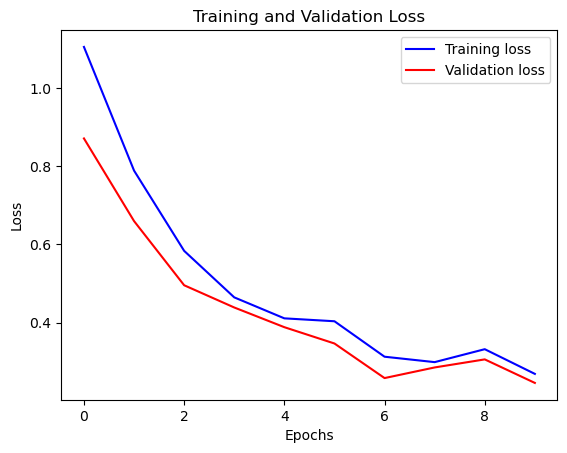

In [39]:
visualize_loss(history, "Training and Validation Loss")

In [40]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.0056
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 53s 2s/step - loss: 1.0056 - val_loss: 0.7993
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.7048
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 51s 2s/step - loss: 0.7048 - val_loss: 0.6140
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.5082
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 40s 2s/step - loss: 0.5082 - val_loss: 0.4533
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4599
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.4599 - val_loss: 0.3822
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3854
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 4

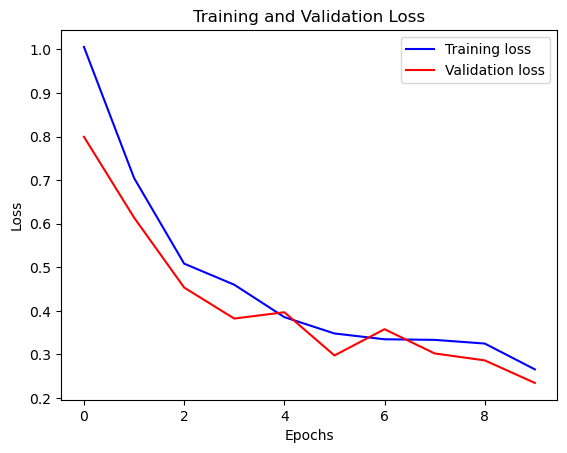

In [41]:
visualize_loss(history, "Training and Validation Loss")

In [42]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.9690
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 52s 2s/step - loss: 0.9690 - val_loss: 0.7649
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.6306
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.6306 - val_loss: 0.5291
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.5580
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 51s 2s/step - loss: 0.5580 - val_loss: 0.5935
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5283
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.5283 - val_loss: 0.4971
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.4402
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 4

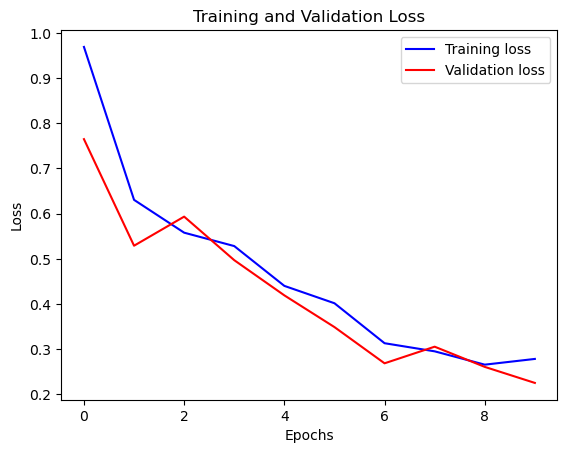

In [43]:
visualize_loss(history, "Training and Validation Loss")

In [44]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.2170
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 42s 2s/step - loss: 2.2170 - val_loss: 1.8800
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.7561
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 1.7561 - val_loss: 1.6383
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 1.5591
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 1.5591 - val_loss: 1.4448
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 1.3326
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 1.3326 - val_loss: 1.1886
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 1.0945
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 5

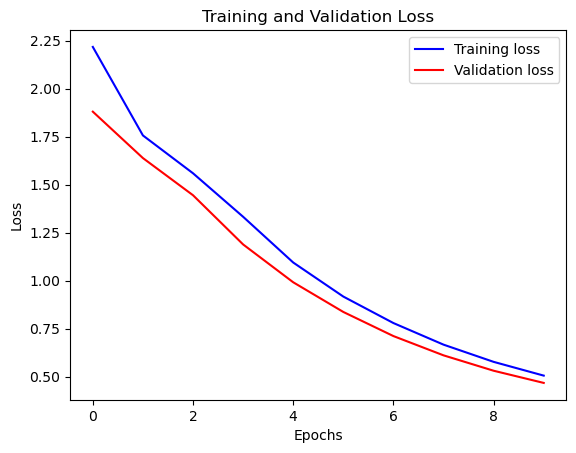

In [45]:
visualize_loss(history, "Training and Validation Loss")

In [46]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.7731
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 42s 2s/step - loss: 1.7731 - val_loss: 1.2854
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.0110
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 1.0110 - val_loss: 0.7340
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.6096
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 40s 2s/step - loss: 0.6096 - val_loss: 0.4901
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4402
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.4402 - val_loss: 0.3895
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3720
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 5

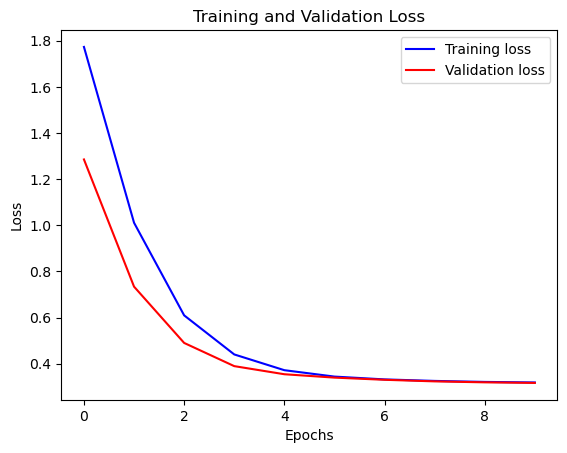

In [47]:
visualize_loss(history, "Training and Validation Loss")

In [48]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.8107
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 1.8107 - val_loss: 1.3693
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.0905
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 40s 2s/step - loss: 1.0905 - val_loss: 0.8386
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.7173
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.7173 - val_loss: 0.5762
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5306
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 40s 2s/step - loss: 0.5306 - val_loss: 0.4573
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.4374
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 4

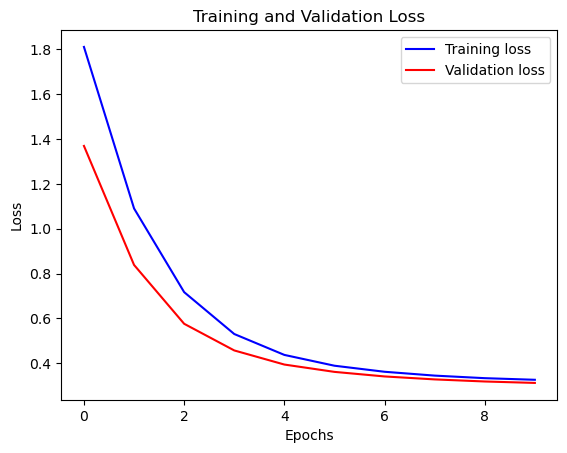

In [49]:
visualize_loss(history, "Training and Validation Loss")

In [50]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
rnn_out = keras.layers.SimpleRNN( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.0285
Epoch 1: val_loss did not improve from 0.20675
23/23 [==============================] - 53s 2s/step - loss: 2.0285 - val_loss: 1.6018
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.3778
Epoch 2: val_loss did not improve from 0.20675
23/23 [==============================] - 52s 2s/step - loss: 1.3778 - val_loss: 1.1409
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.9926
Epoch 3: val_loss did not improve from 0.20675
23/23 [==============================] - 41s 2s/step - loss: 0.9926 - val_loss: 0.8474
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.7491
Epoch 4: val_loss did not improve from 0.20675
23/23 [==============================] - 42s 2s/step - loss: 0.7491 - val_loss: 0.6778
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.6016
Epoch 5: val_loss did not improve from 0.20675
23/23 [==============================] - 5

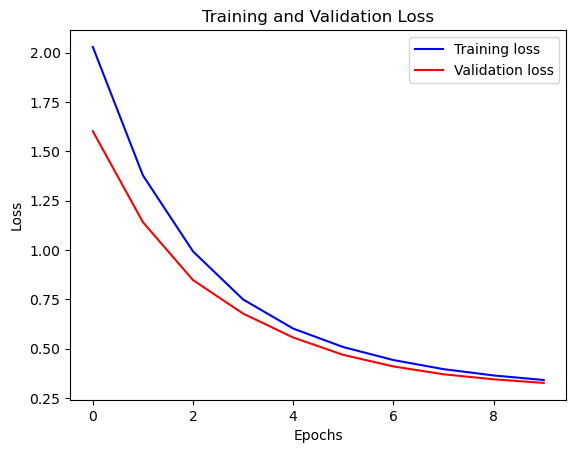

In [51]:
visualize_loss(history, "Training and Validation Loss")